In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlsxwriter
import pandas_flavor as pf

file_path = r"C:\Users\fguar\OneDrive\Documentos\VS Code\Python\Camaras trampa\CT_Data_2021-2024.csv"
data = pd.read_csv(file_path)

file_path2 = r"C:\Users\fguar\OneDrive\Documentos\VS Code\Python\Camaras trampa\CT_Data_2022-2024.csv"
data2 = pd.read_csv(file_path2)

In [2]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['hour'] = data['DateTime'].dt.hour
data['hour'].unique()


data2['DateTime'] = pd.to_datetime(data2['DateTime'])
data2['hour2'] = data2['DateTime'].dt.hour

In [3]:
data = data.loc[(data['Year'] != 1970) & (data['Year'] != 2017)]

In [12]:
#Usando todos los datos

species1 = "Zorro Culpeo"
data_species1 = data[data["Especie"] == "Zorro culpeo"]
species2 = "Liebre"
data_species2 = data[data["Especie"] == "Liebre"]
species3 = "Puma"
data_species3 = data[data["Especie"] == "Puma"]
species4 = "Jabali"
data_species4 = data[data["Especie"] == "Jabali"]
species5= "Raton cola larga"
data_species5 = data[data["Especie"] == "Raton cola larga"]

In [5]:
# Usando datos post- UCT
species1_2 = "Zorro Culpeo"
data_species1_2 = data2[data2["Especie"] == "Zorro culpeo"]
species2_2 = "Liebre"
data_species2_2 = data2[data2["Especie"] == "Liebre"]



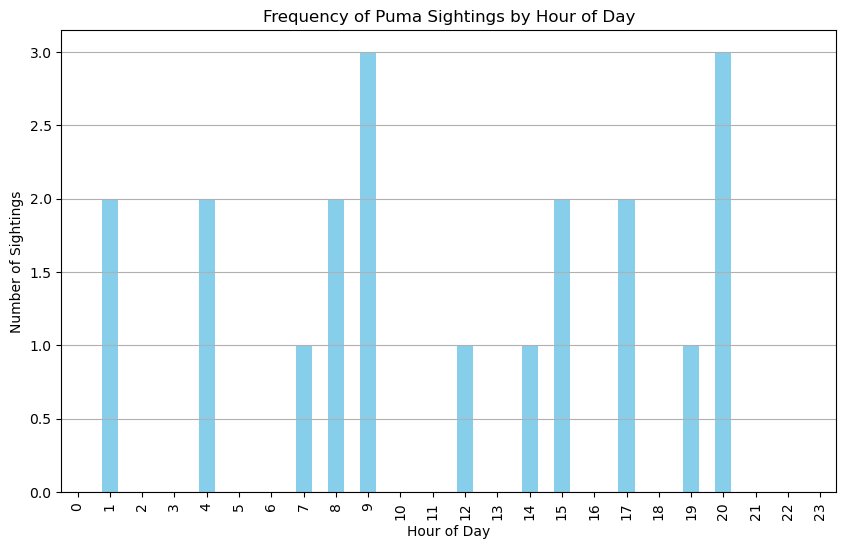

In [6]:
species3 = "Puma"
data_species3 = data[data["Especie"] == "Puma"].copy()
data_species3.loc[:, 'hour'] = data_species3['DateTime'].dt.hour
if 'Episode_ID' in data_species3.columns:
    data_species3 = data_species3.loc[data_species3.groupby('Episode_ID')['Counter0'].idxmax()].copy()
hourly_counts = data_species3['hour'].value_counts().sort_index()
hourly_counts = hourly_counts.reindex(range(24), fill_value=0)


plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Puma Sightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


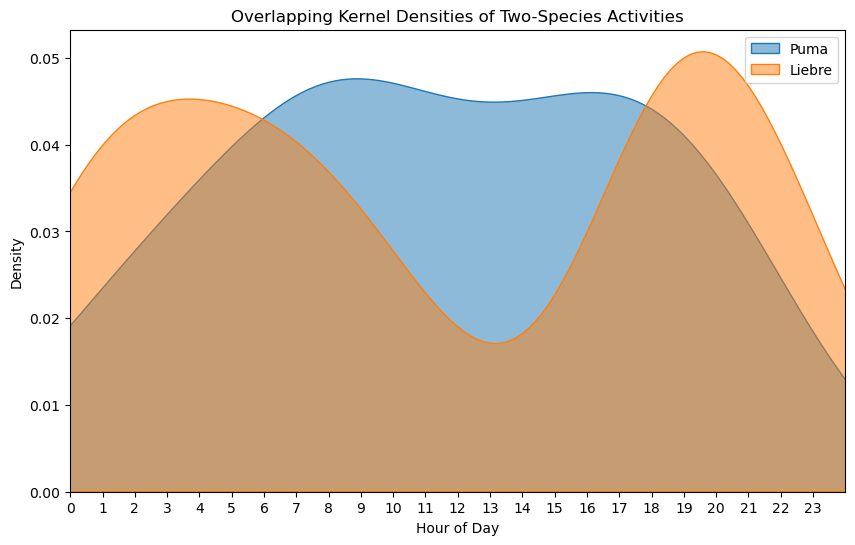

In [7]:
# Plot overlapping kernel densities
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species3['hour'], label=species3, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species2['hour'], label=species2, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend()
plt.show()

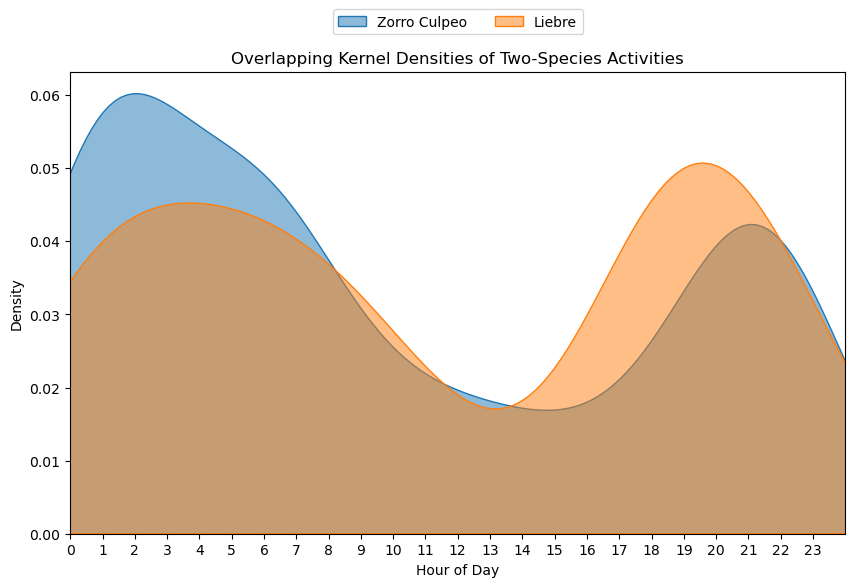

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species1['hour'], label=species1, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species2['hour'], label=species2, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

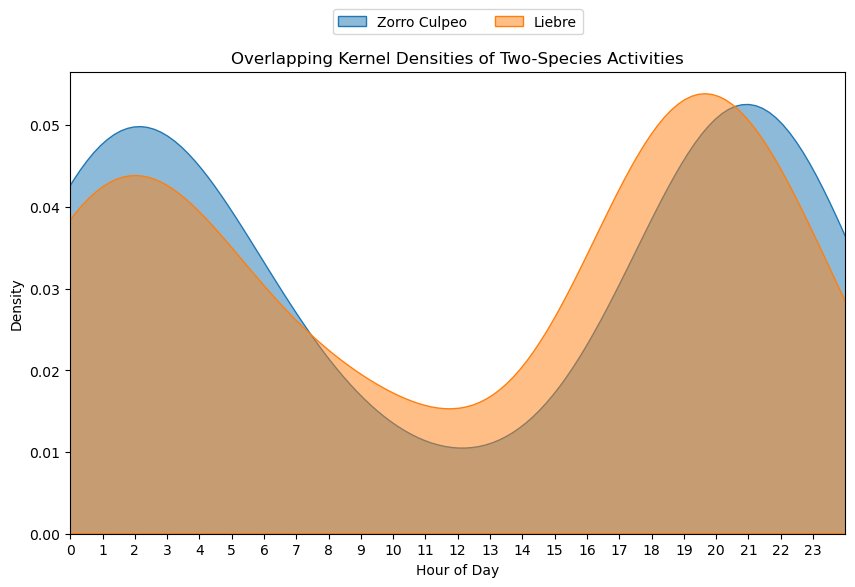

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species1_2['hour2'], label=species1_2, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species2_2['hour2'], label=species2_2, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

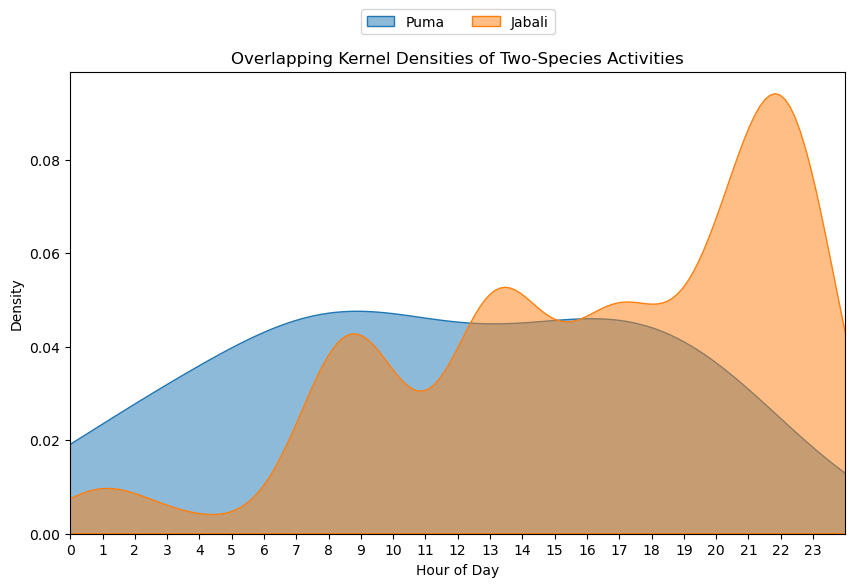

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species3['hour'], label=species3, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species4['hour'], label=species4, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

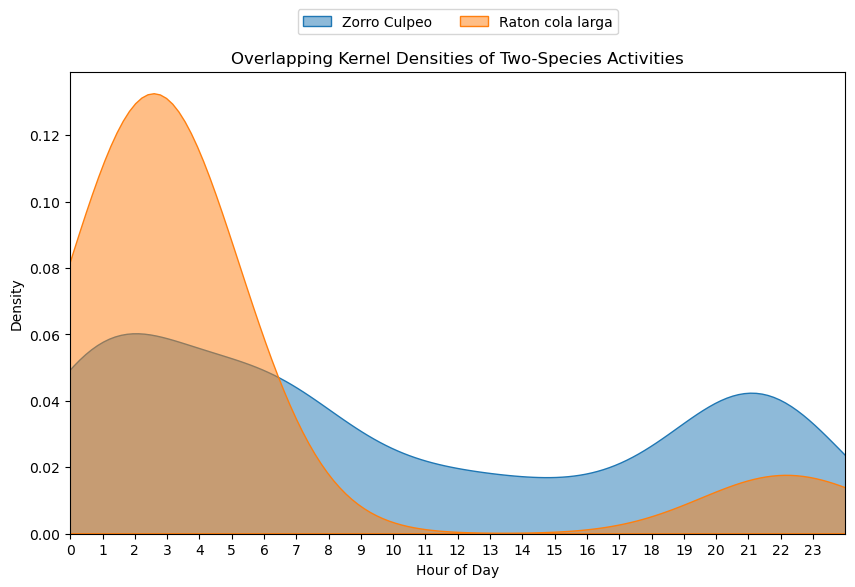

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species1['hour'], label=species1, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species5['hour'], label=species5, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()